In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import tqdm
from tqdm.auto import tqdm

In [2]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

In [3]:
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [6]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [7]:
x_tensor + y_tensor 

tensor([[-9,  5],
        [ 8,  0]])

In [8]:
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [9]:
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

In [10]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [11]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

[[1, 2], [3, 4]]

In [12]:
x_tensor = torch.tensor([3])

x_tensor.item()

3

In [13]:
n = 5
m = 3
linear_layer = nn.Linear(n, m, bias=True)

In [14]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [15]:
linear_layer.weight

Parameter containing:
tensor([[ 0.2959, -0.0191, -0.0125, -0.3050, -0.2737],
        [-0.3208,  0.2163, -0.2087, -0.0912,  0.3895],
        [ 0.4440, -0.0215, -0.3425, -0.3605,  0.3591]], requires_grad=True)

In [16]:
linear_layer.bias

Parameter containing:
tensor([-0.1230, -0.2868, -0.2717], requires_grad=True)

In [17]:
activation = F.tanh

In [18]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

In [19]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

tensor([-0.2875, -0.4389, -0.5451], grad_fn=<TanhBackward0>)

### Полносвязная нейросеть для бинарной классификации

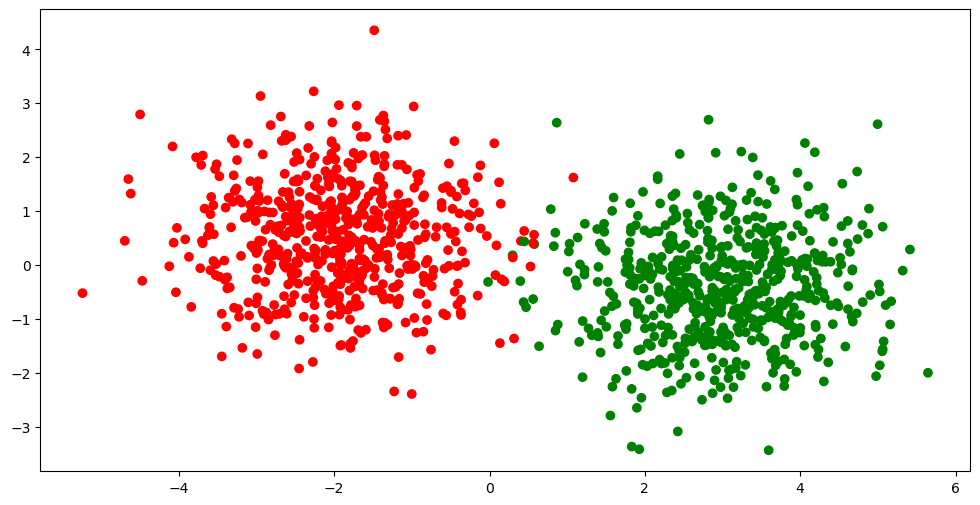

In [20]:
# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [22]:
X_train

array([[-2.24123606e+00,  8.52055397e-01],
       [ 1.50347074e+00, -1.15002393e+00],
       [ 3.55832691e+00, -4.23994609e-01],
       ...,
       [-6.17841009e-01,  1.14870989e+00],
       [ 3.20726733e+00, -4.30655663e-01],
       [ 3.97519763e+00,  1.09416994e-03]])

In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

In [42]:
model = Net()

In [43]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

In [44]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

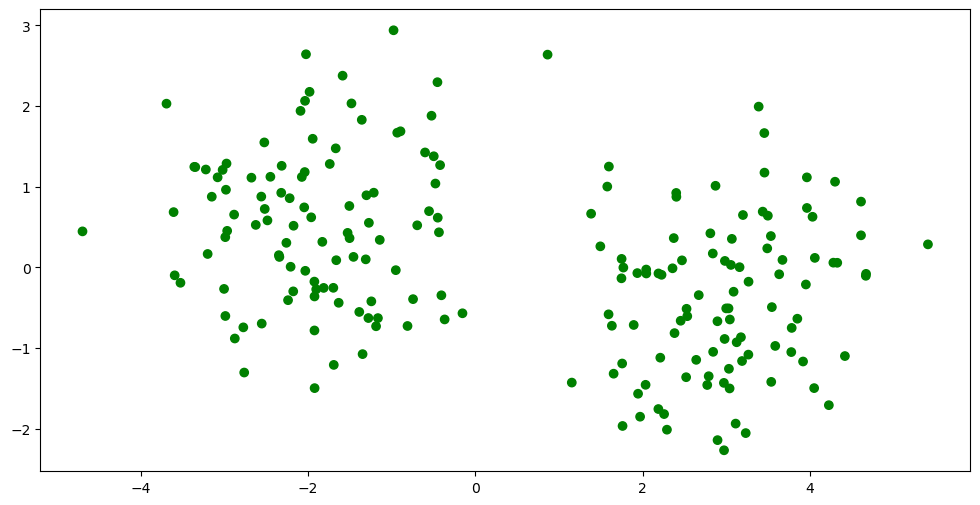

In [45]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(12,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

In [46]:
def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

In [47]:
model = Net()

In [48]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [49]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

In [50]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

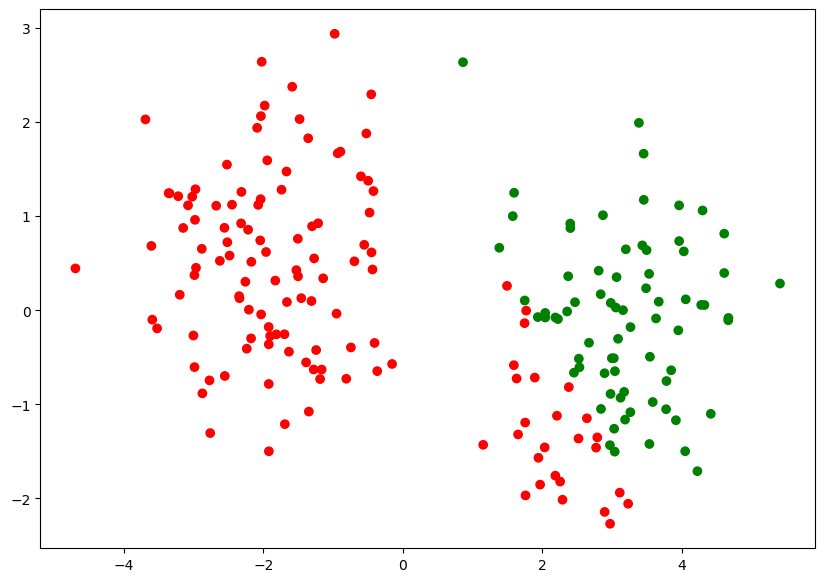

In [51]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

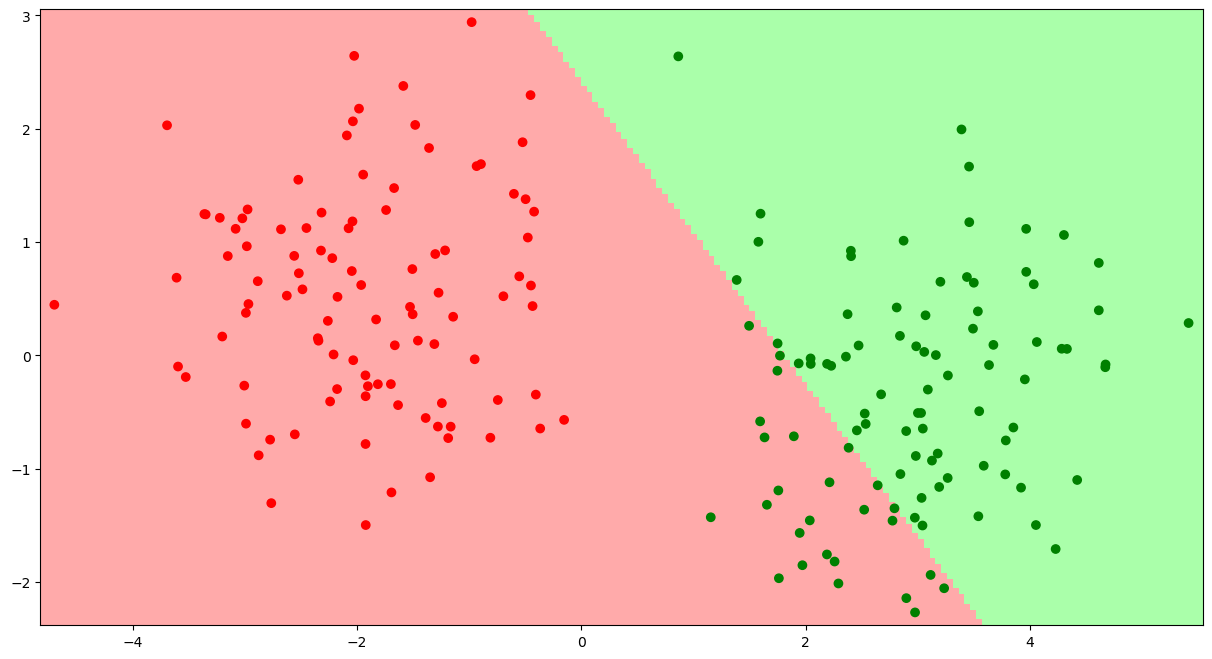

In [52]:
plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

In [53]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

In [54]:
def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

In [55]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [56]:
model = train_stochastic(model, train_loader, criterion, optimizer, 350)

  0%|          | 0/350 [00:00<?, ?it/s]

curr_loss 0.6575266644358635
curr_loss 0.6572651490569115
curr_loss 0.656875055283308
curr_loss 0.656688429415226
curr_loss 0.6519069410860538
curr_loss 0.6518332399427891
curr_loss 0.6500868536531925
curr_loss 0.6490459777414799
curr_loss 0.6490471288561821
curr_loss 0.6466305665671825
curr_loss 0.6479307897388935
curr_loss 0.6453448198735714
curr_loss 0.6463069319725037
curr_loss 0.6422620452940464
curr_loss 0.640868529677391
curr_loss 0.6386120244860649
curr_loss 0.640628632158041
curr_loss 0.6378617882728577
curr_loss 0.6374953240156174
curr_loss 0.636353675276041
curr_loss 0.6348630674183369
curr_loss 0.6341429613530636
curr_loss 0.6325757950544357
curr_loss 0.6321328207850456
curr_loss 0.6312711127102375
curr_loss 0.6308292411267757
curr_loss 0.6323487721383572
curr_loss 0.627940721809864
curr_loss 0.6273720860481262
curr_loss 0.6272188909351826
curr_loss 0.6253076381981373
curr_loss 0.624268714338541
curr_loss 0.6218289956450462
curr_loss 0.621512595564127
curr_loss 0.6182559728

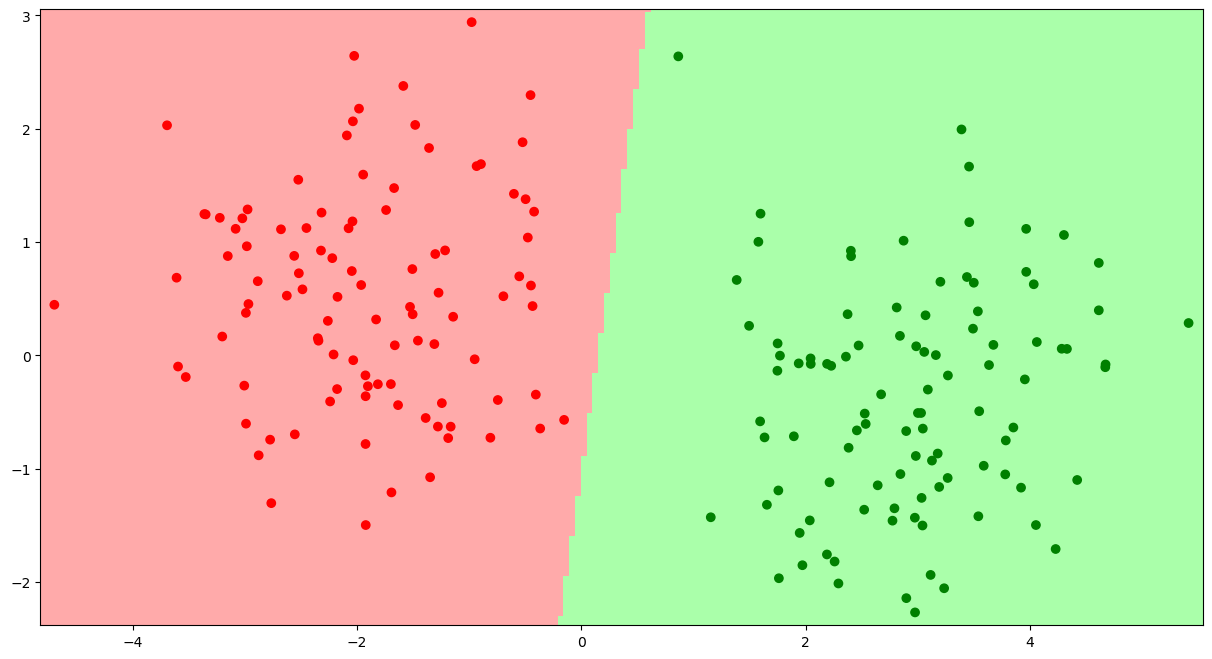

In [57]:
plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);